In [1]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
from sklearn.metrics import accuracy_score
%matplotlib inline

In [2]:

import os, types
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0


body = client_26f6afdbb445461c925ee3348ae87e4b.get_object(Bucket='titanicmachinelearningfromdisaste-donotdelete-pr-3ycav77agvpkdp',Key='train.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df = pd.read_csv(body)
df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df.shape

(891, 12)

# Data preprocessing and Visualization

Lets check how many people survived

In [4]:
df['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

We can see that a total of 342 people survived and 549 did not survive

Let's count the total number of missing values for each column

In [5]:
count_nan = df.isnull().sum()
print(count_nan)

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


Replacing missing Age values with mean values 

In [6]:
mean = df['Age'].mean()
df['Age'].replace(np.nan,mean, inplace=True)
df['Age'].isnull().sum()

0

Replacing missing Embarked values with highest frequency value

In [7]:
df['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [8]:
df['Embarked'].replace(np.nan,'S', inplace=True)
df['Embarked'].isnull().sum()

0

In [9]:
!conda install -c anaconda seaborn -y

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python-3.9

  added / updated specs:
    - seaborn


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ca-certificates-2022.3.29  |       h06a4308_1         122 KB
    ------------------------------------------------------------
                                           Total:         122 KB

The following packages will be UPDATED:

  ca-certificates                      2022.3.29-h06a4308_0 --> 2022.3.29-h06a4308_1



ca-certificates-2022 | 122 KB    | ##################################### | 100% 
Preparing transaction: done
Verifying transaction: done
Executing transaction: done


## Plotting some columns to understand the data better

### Survival rate between age groups of both genders

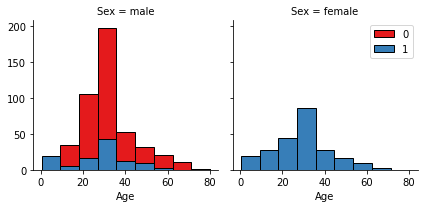

In [10]:
import seaborn as sns

bins = np.linspace(df.Age.min(), df.Age.max(), 10)
g = sns.FacetGrid(df, col="Sex", hue="Survived", palette="Set1", col_wrap=2)
g.map(plt.hist, 'Age', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

From the visualization, we can see that middle aged men had the highest number of deaths 

### Survival rate between different ticket classes of both genders

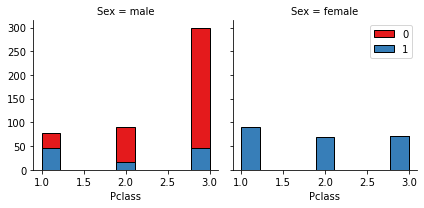

In [11]:
bins = np.linspace(df.Pclass.min(), df.Pclass.max(), 10)
g = sns.FacetGrid(df, col="Sex", hue="Survived", palette="Set1", col_wrap=2)
g.map(plt.hist, 'Pclass', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

We can see that for both sexes, first class passengers had the hughest survival rate. we can also see that male third class passengers had the highest number of deaths 

In [12]:
df.groupby(['Pclass'])['Survived'].value_counts(normalize=True)

Pclass  Survived
1       1           0.629630
        0           0.370370
2       0           0.527174
        1           0.472826
3       0           0.757637
        1           0.242363
Name: Survived, dtype: float64

First class passengers have the highest survival rate

### Let's look at port of embarktion

In [13]:
df.groupby(['Embarked'])['Survived'].value_counts(normalize=True)

Embarked  Survived
C         1           0.553571
          0           0.446429
Q         0           0.610390
          1           0.389610
S         0           0.660991
          1           0.339009
Name: Survived, dtype: float64

Passengers that embarked on the journey from port C had the highest survival rate

### Let's look at gender

In [14]:
 df.groupby(['Sex'])['Survived'].value_counts(normalize=True)

Sex     Survived
female  1           0.742038
        0           0.257962
male    0           0.811092
        1           0.188908
Name: Survived, dtype: float64

74% of females survived while only 18% of males survived 

### Let's look at number of siblings/spouses

In [15]:
 df.groupby(['SibSp'])['Survived'].value_counts(normalize=True)

SibSp  Survived
0      0           0.654605
       1           0.345395
1      1           0.535885
       0           0.464115
2      0           0.535714
       1           0.464286
3      0           0.750000
       1           0.250000
4      0           0.833333
       1           0.166667
5      0           1.000000
8      0           1.000000
Name: Survived, dtype: float64

We can see that passengers with 1 sibling or spouse aboard had the highest survival rate

### Let's look at number of parents/children

In [16]:
df.groupby(['Parch'])['Survived'].value_counts(normalize=True)

Parch  Survived
0      0           0.656342
       1           0.343658
1      1           0.550847
       0           0.449153
2      0           0.500000
       1           0.500000
3      1           0.600000
       0           0.400000
4      0           1.000000
5      0           0.800000
       1           0.200000
6      0           1.000000
Name: Survived, dtype: float64

We can see that passengers with 3 parents/children aboard had the highest survival rate

## Converting categorical variables to numerical values 

### male to 0 and female to 1:

In [17]:
df['Sex'].replace(to_replace=['male','female'], value=[0,1],inplace=True)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S


### Using one hot encoding to convert Embarked variable to binary variables and appending them to the feature data frame

In [18]:
features = df[['Pclass','Sex','Age','SibSp','Parch']]
features = pd.concat([features,pd.get_dummies(df['Embarked'])], axis=1)
features.head()

,Pclass,Sex,Age,SibSp,Parch,C,Q,S
0,3,0,22.0,1,0,0,0,1
1,1,1,38.0,1,0,1,0,0
2,3,1,26.0,0,0,0,0,1
3,1,1,35.0,1,0,0,0,1
4,3,0,35.0,0,0,0,0,1


## Feature selection

Defining feature set X

In [19]:
X = features
X[0:5]

,Pclass,Sex,Age,SibSp,Parch,C,Q,S
0,3,0,22.0,1,0,0,0,1
1,1,1,38.0,1,0,1,0,0
2,3,1,26.0,0,0,0,0,1
3,1,1,35.0,1,0,0,0,1
4,3,0,35.0,0,0,0,0,1


Defining labels

In [20]:
Y = df['Survived'].values
Y[0:5]

array([0, 1, 1, 1, 0])

## Normalize Data

In [21]:
X= preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

array([[ 0.82737724, -0.73769513, -0.5924806 ,  0.43279337, -0.47367361,
        -0.48204268, -0.30756234,  0.61583843],
       [-1.56610693,  1.35557354,  0.63878901,  0.43279337, -0.47367361,
         2.0745051 , -0.30756234, -1.62380254],
       [ 0.82737724,  1.35557354, -0.2846632 , -0.4745452 , -0.47367361,
        -0.48204268, -0.30756234,  0.61583843],
       [-1.56610693,  1.35557354,  0.40792596,  0.43279337, -0.47367361,
        -0.48204268, -0.30756234,  0.61583843],
       [ 0.82737724, -0.73769513,  0.40792596, -0.4745452 , -0.47367361,
        -0.48204268, -0.30756234,  0.61583843]])

# Model Development

## K Nearest Neighbor(KNN)

In [22]:
# splitting into train and test data

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2, random_state=4)

In [23]:
# finding the best k

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

ks=10
mean_acc = np.zeros ((ks-1))
std_acc = np.zeros ((ks-1))

for n in range (1,ks):
    Knn= KNeighborsClassifier(n_neighbors=n).fit(X_train,Y_train)
    Yhat= Knn.predict(X_test)
    mean_acc[n-1]= accuracy_score(Y_test,Yhat)
    
    std_acc[n-1]= np.std(Yhat==Y_test)/np.sqrt(Yhat.shape[0])
    
mean_acc

array([0.77653631, 0.83240223, 0.81005587, 0.82122905, 0.82681564,
       0.82681564, 0.83240223, 0.82681564, 0.83798883])

In [24]:
# using best k

k=9
Knn = KNeighborsClassifier(n_neighbors=k).fit(X_train,Y_train)

## Decision Tree

In [25]:
from sklearn.tree import DecisionTreeClassifier

In [26]:
DescTree = DecisionTreeClassifier(criterion = "entropy", max_depth = 4)
DescTree.fit(X_train,Y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

## Support vector machine

In [27]:
from sklearn import svm

In [28]:
SVM_model = svm.SVC(kernel='rbf')
SVM_model.fit(X_train,Y_train)

SVC()

## Logistic regression

In [29]:
from sklearn.linear_model import LogisticRegression

In [30]:
LR = LogisticRegression(C=0.01, solver = 'liblinear').fit(X_train,Y_train)

# Model evaluation using test data

In [32]:
body = client_26f6afdbb445461c925ee3348ae87e4b.get_object(Bucket='titanicmachinelearningfromdisaste-donotdelete-pr-3ycav77agvpkdp',Key='test.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

test_df = pd.read_csv(body)
test_df.head()


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


counting the total number of missing values for each column

In [33]:
count_nan = test_df.isnull().sum()
print(count_nan)

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


Replacing missing Age values with mean value

In [34]:
mean = test_df['Age'].mean()
test_df['Age'].replace(np.nan,mean, inplace=True)
test_df['Age'].isnull().sum()

0

## Converting categorical variables to numerical values 

### male to 0 and female to 1:

In [35]:
test_df['Sex'].replace(to_replace=['male','female'], value=[0,1],inplace=True)
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",0,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",1,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",0,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",0,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,22.0,1,1,3101298,12.2875,NaN,S


### Using one hot encoding to convert Embarked variable to binary variables and appending them to the feature data frame

In [36]:
test_features = test_df[['Pclass','Sex','Age','SibSp','Parch']]
test_features = pd.concat([test_features,pd.get_dummies(test_df['Embarked'])], axis=1)
test_features.head()

,Pclass,Sex,Age,SibSp,Parch,C,Q,S
0,3,0,34.5,0,0,0,1,0
1,3,1,47.0,1,0,0,0,1
2,2,0,62.0,0,0,0,1,0
3,3,0,27.0,0,0,0,0,1
4,3,1,22.0,1,1,0,0,1


## Test feature selection

In [37]:
test_X = test_features
test_X[0:5]

,Pclass,Sex,Age,SibSp,Parch,C,Q,S
0,3,0,34.5,0,0,0,1,0
1,3,1,47.0,1,0,0,0,1
2,2,0,62.0,0,0,0,1,0
3,3,0,27.0,0,0,0,0,1
4,3,1,22.0,1,1,0,0,1


In [38]:
test_X= preprocessing.StandardScaler().fit(test_X).transform(test_X)
test_X[0:5]

array([[ 0.87348191, -0.75592895,  0.3349926 , -0.49947002, -0.4002477 ,
        -0.56814154,  2.84375747, -1.35067551],
       [ 0.87348191,  1.32287566,  1.32553003,  0.61699237, -0.4002477 ,
        -0.56814154, -0.35164743,  0.74037028],
       [-0.31581919, -0.75592895,  2.51417495, -0.49947002, -0.4002477 ,
        -0.56814154,  2.84375747, -1.35067551],
       [ 0.87348191, -0.75592895, -0.25932986, -0.49947002, -0.4002477 ,
        -0.56814154, -0.35164743,  0.74037028],
       [ 0.87348191,  1.32287566, -0.65554483,  0.61699237,  0.61989583,
        -0.56814154, -0.35164743,  0.74037028]])

## Prediction with Knn

In [77]:
Knn_Yhat = Knn.predict(test_X)
Knn_output = pd.DataFrame({'PassengerId':test_df['PassengerId'],'Survived': Knn_Yhat}) 
Knn_output

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


### Prediction with decision tree

In [76]:
DescTree_Yhat = DescTree.predict(test_X)
DescTree_output = pd.DataFrame({'PassengerId':test_df['PassengerId'],'Survived': DescTree_Yhat})
DescTree_output

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


### prediction with support vector machine

In [75]:
SVM_model_Yhat = SVM_model.predict(test_X)
SVM_output = pd.DataFrame({'PassengerId':test_df['PassengerId'],'Survived': SVM_model_Yhat})
SVM_output

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


### Prediction with logistic regression

In [74]:
LR_Yhat = LR.predict(test_X)
LR_output = pd.DataFrame({'PassengerId':test_df['PassengerId'], 'Survived': LR_Yhat})
LR_output

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0
